In [ ]:
# imports
import numpy as np
import pandas as pd

import colormaps as cmaps # for scientific colormaps

from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.cm as cm

**CM Comments and reply**

Changes to be made to this figure:
- Need to remove top and right axes
    * done
- No title needed - this will be in caption
    * done
- Colorbar is too far from axis - try tight_layout()
    * done -> see "pad"
- Red line is confusing — do black for the line and make it thicker
    * done
- Axis ticks are too small; see code at end of this document to make wider and labels bigger
    * I already use that code
- I would remove the original medium here and reset the axes to make the plot less whitespace - the medium is less important for this model than iml1515.
    * done
- Change the axis to be in terms of £/gDW.hr since it’s already log scaled - makes it easier to read
    * done
- Colormap should be unidirectional, not rainbow for iterations since it’s a unidirectional variable. Try Blues for this one going from light to dark?
    * bamako or blues of bamako? -> you can try to play with the colourmap in the next codeblock to see what you like

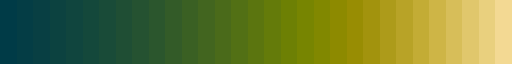

In [ ]:
# currently used
index = 31
cmaps.bamako.cut(0.05, "right").discrete(index)

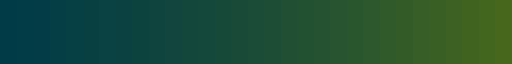

In [39]:
index = 31
cmaps.bamako.cut(0.6, "right").discrete(index)

In [12]:
data = pd.read_csv("Figure1C.csv")

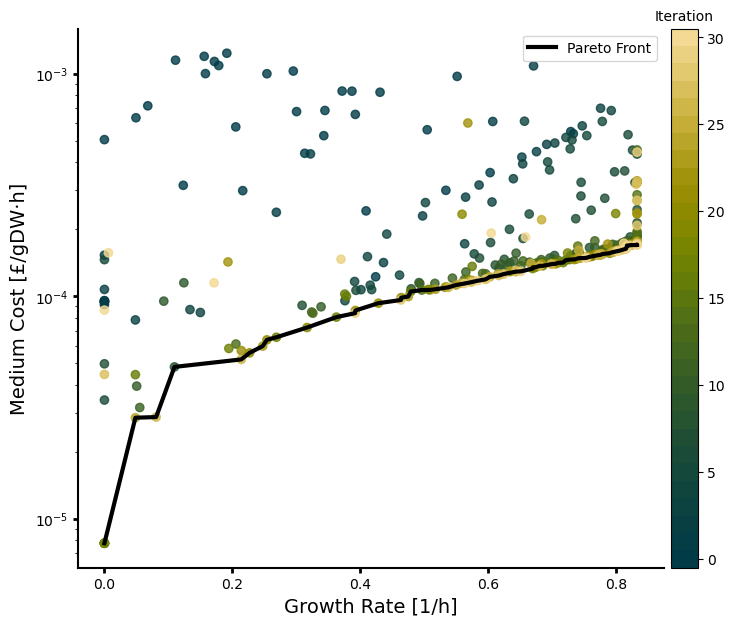

In [36]:
# Create the plot with given size
fig, axes = plt.subplots(1, 1, figsize = (9, 7))

# Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
n_start = data["n_start"][0]
n_batch = data["n_batch"][0]
n_candidates = data["n_candidates"][0]

 # Generate distinct colours
colours = cmaps.bamako.cut(0.05, "right")(np.linspace(0, 1, n_batch + 1))
# Create a custom colourmap for the colour bar
cmap = mcolors.ListedColormap(colours)

# Create an array to store colours for each data point
point_colours = np.zeros(len(data), dtype = object)

# Assign first n_start points the same colour
point_colours[:n_start] = [colours[0]] * n_start
# Assign different colours to each batch
for i in range(n_batch):
    start_idx = n_start + i * n_candidates
    end_idx = start_idx + n_candidates
    point_colours[start_idx:end_idx] = [colours[i + 1]] * (end_idx - start_idx) # Assign a new color per batch
    
# Set boundaries between each batch, from -0.5 to n_batch + 0.5
boundaries = np.arange(n_batch + 2) - 0.5
norm = mcolors.BoundaryNorm(boundaries, cmap.N)

# transform cost data from 10^{-3} £/gDW·h to £/gDW·h
data["cost"] = data["cost"] * 1e-3
# Scatter plot with custom colours, applying transparence (alpha = 0.8)
sc = axes.scatter(data["growth_rate"], data["cost"], c = point_colours, alpha = 0.8)
# Set y-axis to log scale
axes.set_yscale("log")


# Extract and sort Pareto points by growth rate
pareto_data = data[data["is_pareto"] == True].sort_values(by = "growth_rate")
# Plot as a single line connecting the points
axes.plot(
    pareto_data["growth_rate"],
    pareto_data["cost"],
    label = "Pareto Front",
    color = "black",
    linewidth = 3
)


# axes
axes.set_xlabel("Growth Rate [1/h]", fontsize = 14)
axes.set_ylabel("Medium Cost [£/gDW·h]", fontsize = 14)
axes.xaxis.set_tick_params(width = 2, labelsize = 10)
axes.yaxis.set_tick_params(width = 2, labelsize = 10)
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_linewidth(1.5)
axes.spines["left"].set_linewidth(1.5)

# Add the color bar
tick_positions = np.arange(0, n_batch + 1, 5)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axes, ticks = tick_positions, pad = 0.01) # pad defines distance
cbar.ax.set_title("Iteration", fontsize = 10)
cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks at colour boundaries
    
# Display the legend
axes.legend()
    
# Show the plot
plt.show()

fig.set_size_inches(9, 7)  # Consistent physical size in inches
fig.savefig("Figure1C.png", dpi = 300, bbox_inches = None)